In [ ]:
# TASK-1 - SMS Spam Classifier

# Author: Gopal Krishna

# Batch: August

# Domain: Data Science

# Aim: Build a text classification model to classify SMS either spam or not using python.

*Importing important Libraries*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


*Load the Dataset*

In [17]:
df = pd.read_csv('/content/spam.csv',  encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [18]:
df.shape

(5572, 5)

In [19]:

df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [20]:

df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)


In [21]:

df.head(2)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [24]:

df.duplicated().sum()

421

In [25]:
df.drop_duplicates(inplace = True)

In [27]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5151 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5151 non-null   object
 1   v2      5151 non-null   object
dtypes: object(2)
memory usage: 120.7+ KB


*Visualize the Data*

In [28]:
df = df.rename(columns={'v1': 'label', 'v2': 'message'})
df.head(2)

,label,message
0,ham,"go jurong point, crazy.. available bugis n gre..."
1,ham,ok lar... joking wif u oni...


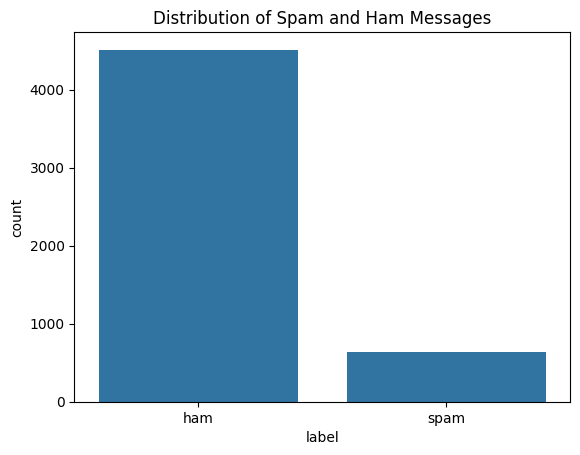

In [29]:
sns.countplot(x='label', data=df)
plt.title('Distribution of Spam and Ham Messages')
plt.show()


*Preprocess the Data*

In [30]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['message'] = df['message'].apply(preprocess_text)

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['message']).toarray()
y = df['label'].map({'ham': 0, 'spam': 1}).values


*Split the Data*

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*Train the Model*

In [32]:
model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

*Evaluate the Model*

Accuracy: 0.976721629485936
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       895
           1       1.00      0.82      0.90       136

    accuracy                           0.98      1031
   macro avg       0.99      0.91      0.94      1031
weighted avg       0.98      0.98      0.98      1031



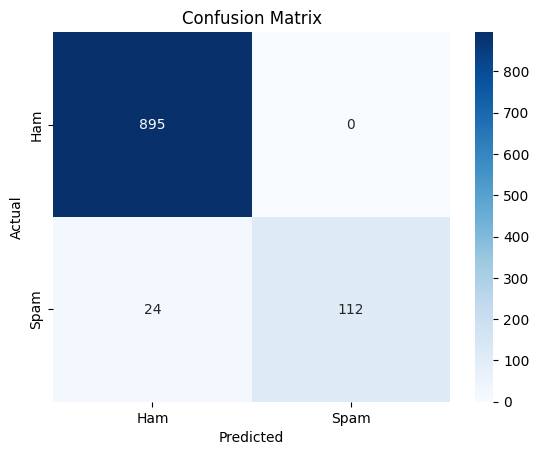

In [33]:
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


*Make Predictions*

In [34]:
def predict_spam(message):
    message = preprocess_text(message)
    message_tfidf = tfidf.transform([message]).toarray()
    prediction = model.predict(message_tfidf)
    return 'spam' if prediction[0] == 1 else 'ham'

print(predict_spam("Congratulations! You've won a free ticket to the Bahamas. Call now!"))


spam
